In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/DataTrained_Project_Week-1/Evaluation_Week1/Global Power Plan Database.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.500,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.000,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.200,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.000,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.000,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.000,23.7689,68.6447,Coal,Oil,NaN,NaN,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.000,10.4547,77.0078,Hydro,NaN,NaN,NaN,1970.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.000,32.2258,77.2070,Hydro,NaN,NaN,NaN,2010.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.000,16.3300,75.8863,Hydro,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.000,23.1642,81.6373,Coal,Oil,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [4]:
df.shape

(907, 27)

In [5]:
#would drop the columns which do not have any data 
df=df.drop(columns=['other_fuel2'],axis=1)
df=df.drop(columns=['other_fuel3'],axis=1)
df=df.drop(columns=['wepp_id'],axis=1)
df=df.drop(columns=['generation_gwh_2013'],axis=1)
df=df.drop(columns=['generation_gwh_2019'],axis=1)
df=df.drop(columns=['estimated_generation_gwh'],axis=1)

In [6]:
df.shape

(907, 21)

In [7]:
catogorical_features= df.select_dtypes(include=[np.object])
#frequency of categories
for col in catogorical_features:
    print(df[col].value_counts())

IND    907
Name: country, dtype: int64
India    907
Name: country_long, dtype: int64
ACME Solar Tower                                                   1
RAICHUR                                                            1
PRYAGRAJ (BARA) TPP                                                1
PULICHINTALA                                                       1
PUNE MILL                                                          1
PURULIA PSS                                                        1
PYKARA                                                             1
PYKARA ALIMATE                                                     1
Panandhro Solar Power Plant                                        1
Patan Taluka Wind Farm                                             1
Patnaik Hatti Wind Farm                                            1
Patnaik Jamnagar Wind Farm                                         1
Patodi Solar Power Plant                                           1
Phagi Solar Power 

country-Only, country in India# So we do not need this columns
name. and gppd_idnr are giving same information
primary_fuel- Is a inbalanced dataset
I do not think URL will matter, So will drop that column
generation_data_source, Lo of Missing data and only 1 unique value, So dicided to Delete
Lot of missing data in other fuel1 data

In [8]:
df=df.drop(columns=['country'],axis=1)
df=df.drop(columns=['country_long'],axis=1)
df=df.drop(columns=['name'],axis=1)
df=df.drop(columns=['url'],axis=1)
df=df.drop(columns=['generation_data_source'],axis=1)
df=df.drop(columns=['other_fuel1'],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gppd_idnr              907 non-null    object 
 1   capacity_mw            907 non-null    float64
 2   latitude               861 non-null    float64
 3   longitude              861 non-null    float64
 4   primary_fuel           907 non-null    object 
 5   commissioning_year     527 non-null    float64
 6   owner                  342 non-null    object 
 7   source                 907 non-null    object 
 8   geolocation_source     888 non-null    object 
 9   year_of_capacity_data  519 non-null    float64
 10  generation_gwh_2014    398 non-null    float64
 11  generation_gwh_2015    422 non-null    float64
 12  generation_gwh_2016    434 non-null    float64
 13  generation_gwh_2017    440 non-null    float64
 14  generation_gwh_2018    448 non-null    float64
dtypes: flo

In [10]:
df.isnull().sum()

gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
owner                    565
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [11]:
#Trying to Impute the missing values, Checking if all the missing rows are same
df_new=pd.DataFrame({})
df_new['generation_gwh_2014']=df['generation_gwh_2014']
df_new['generation_gwh_2015']=df['generation_gwh_2015']
df_new['generation_gwh_2016']=df['generation_gwh_2016']
df_new['generation_gwh_2017']=df['generation_gwh_2017']
df_new['generation_gwh_2018']=df['generation_gwh_2018']

a=df_new.loc[df_new.isnull().any(axis=1)]
print(a.shape)
a
#This shows that the missing rows are common in most of the rows
#Most of them are missin in for all 4 years would delete these columns

(516, 5)


,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN
18,NaN,2702.823200,3515.749600,5777.12000,6241.801000
19,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN


In [12]:
#Checking for ommissioning_year' and 'year_of_capacity_data' has correlation
#But I see no correlation
df_new=pd.DataFrame({})
df_new['commissioning_year']=df['commissioning_year']
df_new['year_of_capacity_data']=df['year_of_capacity_data']
b=df_new.loc[df_new.isnull().any(axis=1)]
print(b.shape)
b

(388, 2)


,commissioning_year,year_of_capacity_data
0,2011.0,NaN
1,NaN,NaN
2,NaN,NaN
17,NaN,NaN
19,NaN,NaN
20,NaN,NaN
21,NaN,NaN
24,NaN,NaN
25,2015.0,NaN
26,NaN,NaN


In [13]:
df=df.drop(columns=['commissioning_year'],axis=1)
df=df.drop(columns=['year_of_capacity_data'],axis=1)

In [14]:
df['owner'].nunique()

280

In [15]:
df['owner']
df=df.drop(columns=['owner'],axis=1)
#It sees that gppd_idnr might serve the same as owner

In [16]:
df['latitude'].nunique()
#Does not seems to add value as all the data is almost unique for a row


836

In [17]:
df=df.drop(columns=['latitude'],axis=1)
df=df.drop(columns=['longitude'],axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gppd_idnr            907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   primary_fuel         907 non-null    object 
 3   source               907 non-null    object 
 4   geolocation_source   888 non-null    object 
 5   generation_gwh_2014  398 non-null    float64
 6   generation_gwh_2015  422 non-null    float64
 7   generation_gwh_2016  434 non-null    float64
 8   generation_gwh_2017  440 non-null    float64
 9   generation_gwh_2018  448 non-null    float64
dtypes: float64(6), object(4)
memory usage: 71.0+ KB


In [19]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

df=df.loc[df.isnull().mean(axis=1).lt(0.5)]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gppd_idnr            907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   primary_fuel         907 non-null    object 
 3   source               907 non-null    object 
 4   geolocation_source   907 non-null    object 
 5   generation_gwh_2014  398 non-null    float64
 6   generation_gwh_2015  422 non-null    float64
 7   generation_gwh_2016  434 non-null    float64
 8   generation_gwh_2017  440 non-null    float64
 9   generation_gwh_2018  448 non-null    float64
dtypes: float64(6), object(4)
memory usage: 71.0+ KB


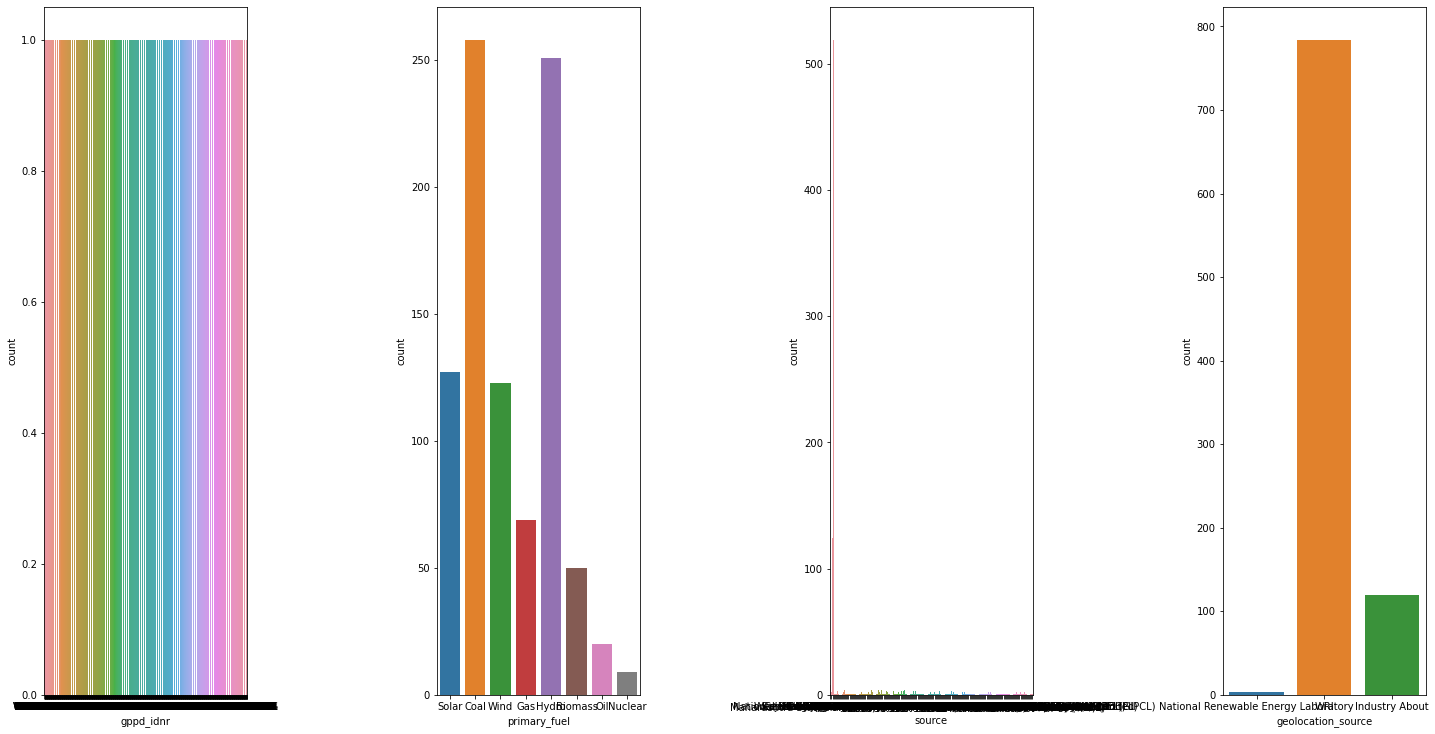

In [21]:
catogorical_features= df.select_dtypes(include=[np.object])
#Ploting the catogorical variables
#Checking the variables
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in catogorical_features:
    if plotnumber<=12:
        ax=plt.subplot(2,4,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()  


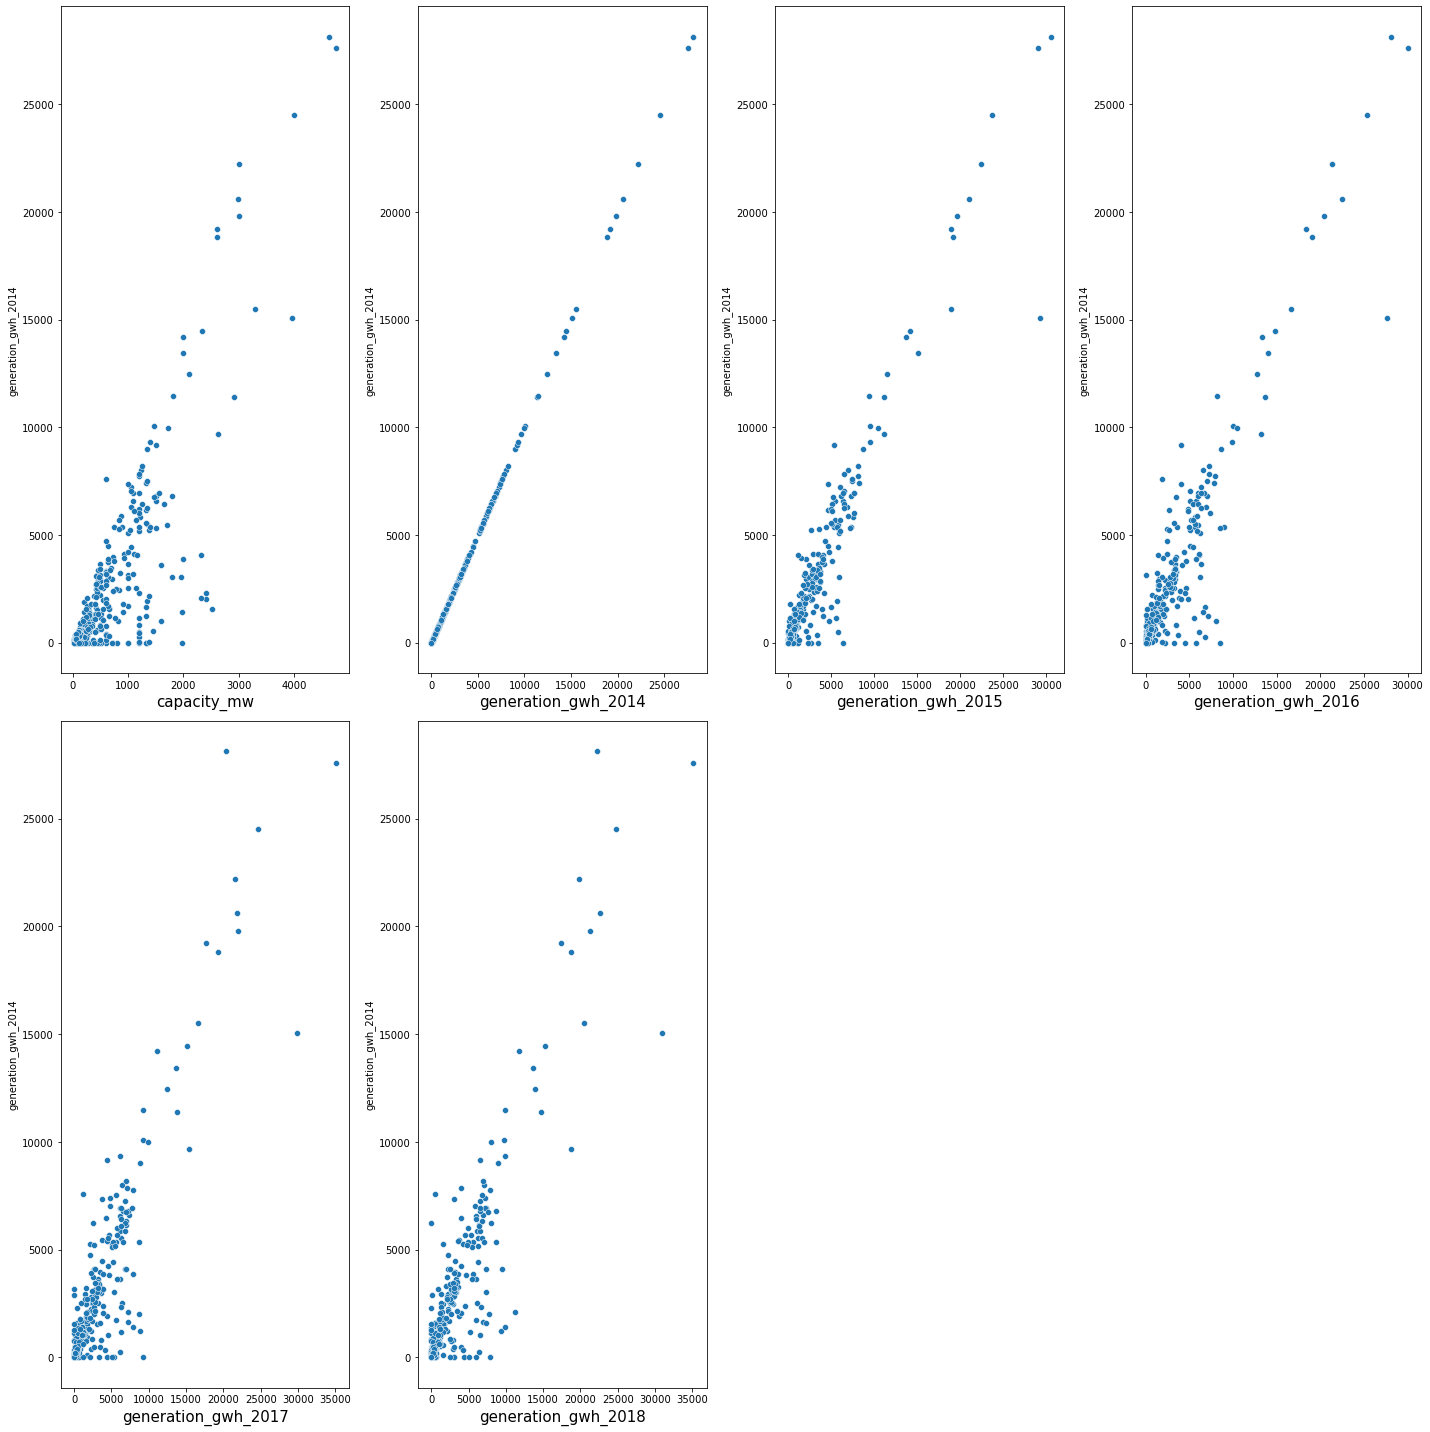

In [22]:
number_features= df.select_dtypes(include=[np.float64])
#Trying to understand how to import missing data
#Ploting the number_features related to columns with missing data
#Checking the variables
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in number_features:
    if plotnumber<=12:
        ax=plt.subplot(2,4,plotnumber)
        sns.scatterplot(df[column],df['generation_gwh_2014'])
        plt.xlabel(column,fontsize=15)
      
    plotnumber+=1
plt.tight_layout()  
#This shows that generation gwth can be imported from capacity _mw

BASED ON THE CAPACITY _MW THE GENERATION GWH IS IMPUTED_ FOR THIS I HAVE BINS THE CAPACITY AND IMPUTED AVERAGE OF GENERATION WWITH RESPECT TO THE BINS THEER BELONG TO

  0 - 500:  710
500 - 1000:   85
1000 - 1500:   69
1500 - 2000:   19
2000 - 2500:   11
2500 - 3000:    6
3000 - 3500:    3
3500 - 4000:    1
4000 - 4500:    1


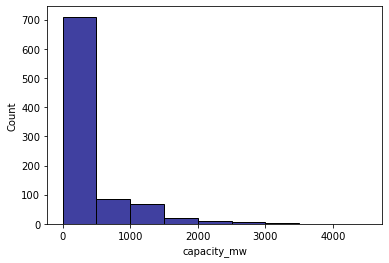

In [23]:
bins = [0,500,1000,1500,2000,2500,3000,3500, 4000, 4500 ]
ax = sns.histplot(df['capacity_mw'], kde=False, bins=bins, color='navy')
for bar, b0, b1 in zip(ax.containers[0], bins[:-1], bins[1:]):
    print(f'{b0:3d} - {b1:3d}: {bar.get_height():4.0f}')

In [24]:
df['capacity_mw_bins'] = pd.cut(df['capacity_mw'], [0,500,1000,1500,2000,2500,3000,3500, 4000, 4500 ])

In [25]:
df

,gppd_idnr,capacity_mw,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,capacity_mw_bins
0,WRI1020239,2.500,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,"(0.0, 500.0]"
1,WRI1019881,98.000,Coal,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,"(0.0, 500.0]"
2,WRI1026669,39.200,Wind,CDM,WRI,NaN,NaN,NaN,NaN,NaN,"(0.0, 500.0]"
3,IND0000001,135.000,Gas,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,"(0.0, 500.0]"
4,IND0000002,1800.000,Coal,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,"(1500.0, 2000.0]"
5,IND0000003,250.000,Coal,Central Electricity Authority,WRI,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,"(0.0, 500.0]"
6,IND0000004,60.000,Hydro,Central Electricity Authority,WRI,157.558250,152.195200,61.421350,89.629600,48.327150,"(0.0, 500.0]"
7,IND0000005,192.000,Hydro,Central Electricity Authority,WRI,674.391100,721.335200,675.724400,679.594950,579.318850,"(0.0, 500.0]"
8,IND0000006,290.000,Hydro,Central Electricity Authority,WRI,480.594950,144.434200,402.029750,439.372100,406.377900,"(0.0, 500.0]"
9,IND0000007,210.000,Coal,Central Electricity Authority,WRI,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,"(0.0, 500.0]"


In [26]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
df['capacity_mw_bins']=LE.fit_transform(df['capacity_mw_bins'])

In [27]:
item_avg_weight = df.pivot_table(values='generation_gwh_2014', index='capacity_mw_bins')

missing_values = df['generation_gwh_2014'].isnull()
print('Missing values: %d' %sum(missing_values))

df.loc[missing_values,'generation_gwh_2014']  = df.loc[missing_values,'capacity_mw_bins'].apply(lambda x: item_avg_weight.at[x,'generation_gwh_2014'])
print('Missing values after immputation %d' %sum(df['generation_gwh_2014'].isnull()))

Missing values: 509
Missing values after immputation 0


In [28]:
item_avg_weight = df.pivot_table(values='generation_gwh_2015', index='capacity_mw_bins')

missing_values = df['generation_gwh_2015'].isnull()
print('Missing values: %d' %sum(missing_values))

df.loc[missing_values,'generation_gwh_2015']  = df.loc[missing_values,'capacity_mw_bins'].apply(lambda x: item_avg_weight.at[x,'generation_gwh_2015'])
print('Missing values after immputation %d' %sum(df['generation_gwh_2015'].isnull()))

Missing values: 485
Missing values after immputation 0


In [29]:
item_avg_weight = df.pivot_table(values='generation_gwh_2016', index='capacity_mw_bins')

missing_values = df['generation_gwh_2016'].isnull()
print('Missing values: %d' %sum(missing_values))

df.loc[missing_values,'generation_gwh_2016']  = df.loc[missing_values,'capacity_mw_bins'].apply(lambda x: item_avg_weight.at[x,'generation_gwh_2016'])
print('Missing values after immputation %d' %sum(df['generation_gwh_2016'].isnull()))

Missing values: 473
Missing values after immputation 0


In [30]:
item_avg_weight = df.pivot_table(values='generation_gwh_2017', index='capacity_mw_bins')

missing_values = df['generation_gwh_2017'].isnull()
print('Missing values: %d' %sum(missing_values))

df.loc[missing_values,'generation_gwh_2017']  = df.loc[missing_values,'capacity_mw_bins'].apply(lambda x: item_avg_weight.at[x,'generation_gwh_2017'])
print('Missing values after immputation %d' %sum(df['generation_gwh_2017'].isnull()))

Missing values: 467
Missing values after immputation 0


In [31]:
item_avg_weight = df.pivot_table(values='generation_gwh_2018', index='capacity_mw_bins')

missing_values = df['generation_gwh_2018'].isnull()
print('Missing values: %d' %sum(missing_values))

df.loc[missing_values,'generation_gwh_2018']  = df.loc[missing_values,'capacity_mw_bins'].apply(lambda x: item_avg_weight.at[x,'generation_gwh_2018'])
print('Missing values after immputation %d' %sum(df['generation_gwh_2018'].isnull()))

Missing values: 459
Missing values after immputation 0


In [32]:
df['source'].nunique()
df['source']=LE.fit_transform(df['source'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gppd_idnr            907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   primary_fuel         907 non-null    object 
 3   source               907 non-null    int32  
 4   geolocation_source   907 non-null    object 
 5   generation_gwh_2014  907 non-null    float64
 6   generation_gwh_2015  907 non-null    float64
 7   generation_gwh_2016  907 non-null    float64
 8   generation_gwh_2017  907 non-null    float64
 9   generation_gwh_2018  907 non-null    float64
 10  capacity_mw_bins     907 non-null    int32  
dtypes: float64(6), int32(2), object(3)
memory usage: 71.0+ KB


In [34]:
df['primary_fuel']=LE.fit_transform(df['primary_fuel'])
df['geolocation_source']=LE.fit_transform(df['geolocation_source'])
df=df.drop(columns=['gppd_idnr'],axis=1)

DATA IMPUTING AND ENCODING DONE

CLASSIFICATION PREDICTION MODELS

In [40]:
df.skew()

capacity_mw            3.123576
primary_fuel           0.472251
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014    5.117608
generation_gwh_2015    5.494942
generation_gwh_2016    5.244910
generation_gwh_2017    5.226934
generation_gwh_2018    5.083744
capacity_mw_bins       3.578515
dtype: float64

In [41]:
#Correction of Screwness, Use Z Score
from scipy.stats import zscore
z_score=zscore(df[['capacity_mw','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw_bins']])
abs_zscore=np.abs(z_score)
filtering_entry=(abs_zscore<3).all(axis=1)
df=df[filtering_entry]
df.describe()
df.shape

(868, 10)

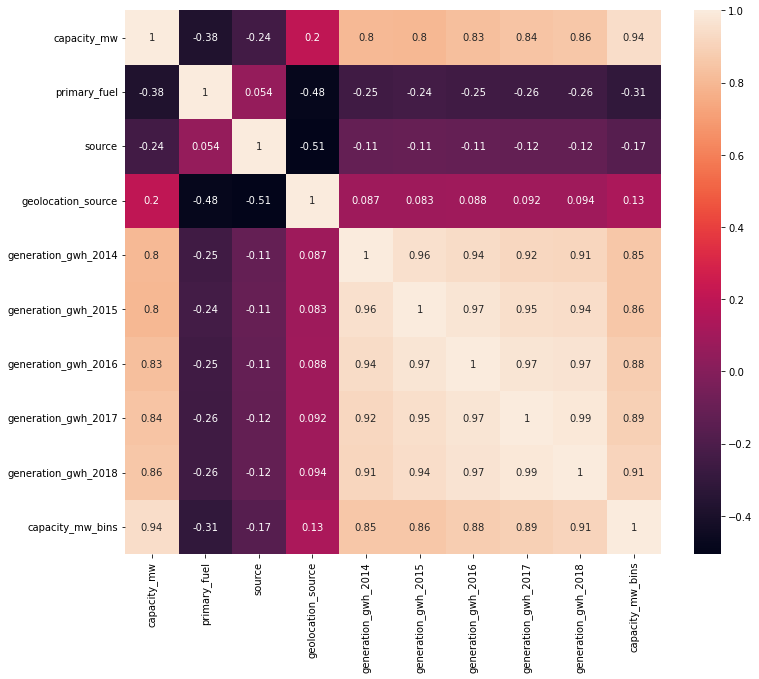

,capacity_mw,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,capacity_mw_bins
capacity_mw,1.000000,-0.380395,-0.242122,0.204865,0.800559,0.799252,0.826564,0.844904,0.857853,0.942821
primary_fuel,-0.380395,1.000000,0.053613,-0.483217,-0.247617,-0.238469,-0.249358,-0.255878,-0.258619,-0.310474
source,-0.242122,0.053613,1.000000,-0.505720,-0.113257,-0.107897,-0.114152,-0.118713,-0.120462,-0.165071
geolocation_source,0.204865,-0.483217,-0.505720,1.000000,0.087351,0.082890,0.088373,0.092318,0.093723,0.129703
generation_gwh_2014,0.800559,-0.247617,-0.113257,0.087351,1.000000,0.955391,0.938669,0.921116,0.913828,0.854887
generation_gwh_2015,0.799252,-0.238469,-0.107897,0.082890,0.955391,1.000000,0.974856,0.947117,0.942854,0.858127
generation_gwh_2016,0.826564,-0.249358,-0.114152,0.088373,0.938669,0.974856,1.000000,0.974792,0.966700,0.880570
generation_gwh_2017,0.844904,-0.255878,-0.118713,0.092318,0.921116,0.947117,0.974792,1.000000,0.987834,0.893037
generation_gwh_2018,0.857853,-0.258619,-0.120462,0.093723,0.913828,0.942854,0.966700,0.987834,1.000000,0.907550
capacity_mw_bins,0.942821,-0.310474,-0.165071,0.129703,0.854887,0.858127,0.880570,0.893037,0.907550,1.000000


In [37]:
Corr=df.corr()
#Checking for Correlation
Corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(Corr,annot=True)
plt.show()
#This plot shows that there is lot of Multicollinearity between the features and there is very less correlation with the either of the Labels
Corr

In [43]:
print(df['primary_fuel'].value_counts())

3    251
1    231
7    123
6    121
2     68
0     45
5     20
4      9
Name: primary_fuel, dtype: int64


In [44]:
x=df.drop(columns=['primary_fuel'],axis=1)
y=df['primary_fuel']

#This does not seem to be balanced-Balancing with SMOTE
from imblearn.over_sampling import SMOTE
stategy = {7:188,6:188,2:188,0:188,5:188,4:188}
#188 HERE IMPLIES 75% OF MAJORITY CLASS
oversample=SMOTE(sampling_strategy=stategy,k_neighbors=5)
x_smoted, y_smoted=oversample.fit_resample(x,y)

# summarize distribution
counter = y_smoted.value_counts()
for k,v in counter.items():
    per = v / len(y_smoted) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    

Class=3, n=251 (15.590%)
Class=1, n=231 (14.348%)
Class=6, n=188 (11.677%)
Class=7, n=188 (11.677%)
Class=2, n=188 (11.677%)
Class=0, n=188 (11.677%)
Class=5, n=188 (11.677%)
Class=4, n=188 (11.677%)


In [70]:
#StandardScaler cannot guarantee balanced feature scales in the presence of outliers. MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] 

from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x_scaled=sc.fit_transform(x_smoted)

In [71]:
#Train the data to the model

x_train, x_test, y_train, y_test=train_test_split(x_scaled,y_smoted,test_size=0.25, random_state=100)

In [72]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.90      0.96      0.92        45
           1       0.76      0.65      0.70        57
           2       0.73      0.66      0.69        50
           3       0.81      0.89      0.85        62
           4       0.92      0.90      0.91        50
           5       0.84      0.97      0.90        37
           6       1.00      0.98      0.99        52
           7       1.00      1.00      1.00        50

    accuracy                           0.87       403
   macro avg       0.87      0.88      0.87       403
weighted avg       0.87      0.87      0.87       403



In [73]:
from sklearn.ensemble import BaggingClassifier
bclf=BaggingClassifier()
bclf.fit(x_train,y_train)
y_pred=bclf.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        45
           1       0.69      0.61      0.65        57
           2       0.73      0.66      0.69        50
           3       0.82      0.87      0.84        62
           4       0.90      0.92      0.91        50
           5       0.78      0.95      0.85        37
           6       1.00      0.98      0.99        52
           7       1.00      1.00      1.00        50

    accuracy                           0.85       403
   macro avg       0.85      0.86      0.86       403
weighted avg       0.85      0.85      0.85       403



In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82        45
           1       0.71      0.56      0.63        57
           2       0.64      0.56      0.60        50
           3       0.71      0.81      0.76        62
           4       0.86      0.88      0.87        50
           5       0.74      0.78      0.76        37
           6       1.00      0.98      0.99        52
           7       0.98      0.98      0.98        50

    accuracy                           0.80       403
   macro avg       0.80      0.81      0.80       403
weighted avg       0.80      0.80      0.80       403



In [75]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.54      0.76      0.63        45
           1       0.67      0.35      0.46        57
           2       0.49      0.34      0.40        50
           3       0.28      0.79      0.42        62
           4       0.79      0.82      0.80        50
           5       0.00      0.00      0.00        37
           6       1.00      0.96      0.98        52
           7       0.00      0.00      0.00        50

    accuracy                           0.52       403
   macro avg       0.47      0.50      0.46       403
weighted avg       0.49      0.52      0.48       403



#Would go with random foest

In [77]:
#Cross Validation
from sklearn.model_selection import KFold,cross_val_score
k_f=KFold(n_splits=5, shuffle=True)
k_f
x_scaled=pd.DataFrame(x_scaled)
from sklearn.metrics import accuracy_score
k=5
acc_score = []

for train_index , test_index in k_f.split(x_smoted):
    x_train , x_test = x_scaled.iloc[train_index,:],x_smoted.iloc[test_index,:]
    y_train , y_test = y_smoted.iloc[train_index] , y_smoted.iloc[test_index]
     
    RF.fit(x_train,y_train)
    pred_values = RF.predict(x_test)
     
    acc = metrics.r2_score(y_test,pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.7633929596546418, 0.7723648480720197, 0.8046449782133387, 0.7604262502300055, 0.8138369628059356]
Avg accuracy : 0.7829331997951883


In [79]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV


params={'n_estimators':[60,70,90],
        'criterion':['mse','gini'],
        'max_depth':[10,11],
         'min_samples_split':[10,11,15],
         'min_samples_leaf':[4,5]
       }
grd=GridSearchCV(RF,param_grid=params,)
grd.fit(x_train,y_train)
RF=grd.best_estimator_
y_pred=RF.predict(x_test)
RF_accuracy=metrics.r2_score(y_test,y_pred)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        36
           1       0.77      0.46      0.57        50
           2       0.68      0.56      0.61        41
           3       0.72      0.83      0.77        58
           4       0.80      0.88      0.84        41
           5       0.73      0.93      0.82        29
           6       1.00      0.97      0.98        32
           7       0.95      1.00      0.97        35

    accuracy                           0.80       322
   macro avg       0.81      0.82      0.80       322
weighted avg       0.79      0.80      0.79       322



##Regression Model

In [80]:
#Building a Model for Regression for predicting capacity_mw
x_reg=df.drop(columns=['capacity_mw'],axis=1)
y_reg=df['capacity_mw']

In [81]:
#StandardScaler cannot guarantee balanced feature scales in the presence of outliers. MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] 

from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x_scaled=sc.fit_transform(x_reg)

In [83]:
#Train the data to the model

x_train, x_test, y_train, y_test=train_test_split(x_scaled,y_reg,test_size=0.25, random_state=100)

In [84]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
reg_accuracy=metrics.r2_score(y_test,y_pred)
print(reg_accuracy)

0.9415450677107132


In [85]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
ada_accuracy=metrics.r2_score(y_test,y_pred)
print(ada_accuracy)

0.9590085329472622


In [86]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train,sample_weight=100)
y_pred=RFR.predict(x_test)
RFR_accuracy=metrics.r2_score(y_test,y_pred)
print(RFR_accuracy)

0.9673763271679234


In [89]:
#Cross Validation
from sklearn.model_selection import KFold,cross_val_score
k_f=KFold(n_splits=5, shuffle=True)
k_f
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
from sklearn.metrics import accuracy_score
k=5
acc_score = []

for train_index , test_index in k_f.split(x_scaled):
    x_train , x_test = x_scaled.iloc[train_index,:],x_scaled.iloc[test_index,:]
    y_train , y_test = y_reg.iloc[train_index] , y_reg.iloc[test_index]
     
    RFR.fit(x_train,y_train)
    pred_values = RFR.predict(x_test)
     
    acc = metrics.r2_score(y_test,pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9735175523270108, 0.9453890384670524, 0.9554085719483247, 0.9608235710013142, 0.9515966440745893]
Avg accuracy : 0.9573470755636583


In [90]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt_clf=GradientBoostingRegressor()
gbdt_clf.fit(x_train,y_train)
y_pred=gbdt_clf.predict(x_test)
gbdt_clf_accuracy=metrics.r2_score(y_test,y_pred)
gbdt_clf_accuracy

0.9533459355340459

In [91]:
#Will Go with Random Forest Regressor

In [92]:
with open("RF", "wb") as f:
    pickle.dump(RF, f)

In [93]:
with open("RFR", "wb") as f:
    pickle.dump(RFR, f)